# 최대 가능도 추정
최대가능도추정(MLE, Maximum Likelihood Estimation) 방법은 확률모형의 모수추정에서 가장 일반적으로 사용되는 방법이다. 

확률변수 X 에 대한 확률모형은 확률밀도함수 $f_X$에 의해 정의된다. 확률밀도함수는 일반적으로 확률밀도함수 $f_{x}$에 의해 정의된다. 확률밀도함수는 일반적으로 $f_{X}(x;\theta)$는 확률 밀도함수, 즉 확률모형의 모수 집함을 대표하는 기호이다. 

그러나 샘플값은 알고 있지만, 모수 $\theta$는 전혀 모르고 있다고 가정해보자, 이 경우 , 샘플값 x에서 모수 $\theta$를 찾아야 하는 경우가 있는데, 이것이 가능도(Likelihood)이다. 

$$ \mathcal{L}(\theta;x) = f_X(x \vert \theta) $$ 

* 확률밀도함수의 변수가 모수 $\theta$ 이다. 
* 확륣밀도함수에서 샘플 x가 발생했을때, 이 샘플 값 x가 나오게 하는 파라미터 $\theta$의 가능성 
* x가 이미 정해져 있는 상황에서 $\theta$ 값의 상대적가능성이다. 

## 최대가능도의 사례 

최대우도추정에서는 샘플 x에 대해 우도를 가장 크게 해주느 모수 $\theta$를 찾는 방법이다. 예를 들어 확률변수의 분산 $\sigma^2=1$은 알고 있으나, 평균 $\mu$를 모르고 있어 이를 추정해야 하는 문제를 생각해보자. 

이때 이대 확률변수 $x_0=1$를 가지고 있다. $X_0$값에서 어떤 $\mu$값이 가장 가능성이 있어보인는가? 로그가능도 함수를 통해서 최대 가능도를 계산하낟. 

또한 우도를 직접 사용하는 것이 아니라 우도를 로그변환한 로그 우도(Log likelihood)함수  를 사용한다. 
$$\hat\theta_{\text{MLE}} = \arg \max_{\theta} L(\theta; \{x_i\})$$
샘플의 수가 복수인 경우 결합 확률 밀도 함수 즉 우도 함수가 동일한 함수의 곱으로 나타나는 경우가 많은데 이 때 로그 변환에 의해 곱셈이 덧셈으로 변하여 계산이 용이해지기 때문이다.


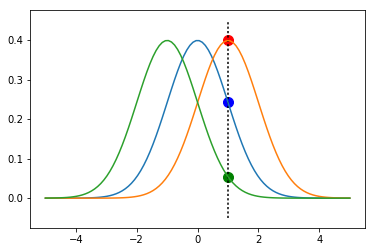

In [25]:
import numpy as np 
import scipy.stats as st 
import matplotlib.pyplot as plt 

x = np.linspace(-5, 5, 100)
plt.plot(x, st.norm(loc=0).pdf(x)) 
plt.plot(x, st.norm(loc=1).pdf(x)) 
plt.plot(x, st.norm(loc=-1).pdf(x))
plt.scatter(1, st.norm(loc=-1).pdf(1), s=100, c='g')
plt.scatter(1, st.norm(loc=0).pdf(1), s=100, c='b')
plt.scatter(1, st.norm(loc=1).pdf(1), s=100, c='r')
plt.vlines(1, -0.05, 0.45, linestyle=":")
plt.show()

## 로그가능도 함수를 활용한 모수 추정 

가능도 함수의 계산을 위해서, 함수에 로그를 씌워서 계산을 하기도 하는데 이를 '로그가능도함수' 라고 한다. 최대가능도의 모수 $\theta$는 로그가능도 함수를 통하여 아래와 같이 산출된다.  

$$ \mathcal{L}(\theta;x) = \prod_{i=1}^n Pr(x_i|\theta) $$
$$ ln\mathcal{L}(\theta) = lnPr(x_1|\theta)+\cdots lnPr(x_n|\theta)$$

이러한 로그 가능도 함수를 구한다음에, 편미분을 해서 모수를 찾아낸다. 구체적인 함수의 도출은 확률분포에 따라 다르므로, 확률분포에 따라 살펴보겠다. 

### 이항분포

실제로 해본 이항분포 실험 $x_1 \cdots x_n$ 에서 모수 $\theta$를 추정해보자.

$$ \mathcal{L}(\theta;x_{1:n})= \prod_{i=1}^n \theta^{x_i}(1-\theta)^{1-x_i} $$

로그가능도 함수를 구하면, 

$$ log \mathcal{L}(\theta)= \sum_{i=1}^n x_ilog\theta + \sum_{i=1}^n x_ilog(1-\theta)  $$ 

이항분포이니까, 샘플 x는 성공(1) 아니면, 실패(0)이다. 전체 시도횟수를 N으로 두고 성공한 횟수를 S로 두겠다. 

$$ log \mathcal{L}(\theta)= log\theta + (N-S)log(1-\theta)  \\
= \frac{\partial \log L}{\partial \theta}= \frac{\partial} {\partial\theta}Nlog(\theta){(N-s) \log(1 - \theta)} \\
= \frac{S}{N} $$

In [2]:
import scipy.stats as st 
import numpy as np 
sample=st.bernoulli(0.4).rvs(1000)
N,S=np.bincount(sample)
S/(N+S)

0.38400000000000001

### 정규분포의 모수 추정 
가우스 정규분포에서는  평균과 분산을 모두 찾아야 함므로 두번 편미분을 해야 한다. 가우시안 정규 분포에서 n개의 독립샘플이 있는 경우는 
$$L(\theta;x_{1:N}) = p(x_{1:N};\theta) = \prod_{i=1}^N  \dfrac{1}{\sqrt{2\pi\sigma^2}} \exp \left(-\dfrac{(x_i-\mu)^2}{2\sigma^2}\right)$$
로그가능도를 구해보자. 
$$
logP(x_{1:N};\theta)\\
$$
다음 로그가능도를 편미붐하여서 해를 찾는다. 
$$
\begin{eqnarray*}
\dfrac{\partial \log L}{\partial \theta_k} 
&=& \dfrac{\partial}{\partial \theta_k} \left\{ \sum_{k=1}^K \log\theta_k N_k  + \lambda \left(1- \sum_{k=1}^K \theta_k\right)  \right\} = 0 \\
\dfrac{\partial \log L}{\partial \lambda} 
&=& \dfrac{\partial}{\partial \lambda} \left\{ \sum_{k=1}^K \log\theta_k N_k  + \lambda \left(1- \sum_{k=1}^K \theta_k \right)  \right\} = 0\\
\end{eqnarray*}
$$

In [17]:
import scipy as sp

sp.random.seed(0)
x1 = st.norm(1, 0).rvs(1000)
xbar1 = x1.mean()
s1 = x.std(ddof=1)
ans1=[xbar1, s1]

sp.random.seed(202)
x2 = st.norm(1, 0).rvs(1000)
xbar2 = x2.mean()
s2 = x.std(ddof=1)
ans2=[xbar2, s2]

sp.random.seed(323)
x3 = st.norm(1, 0).rvs(1000)
xbar3 = x3.mean()
s3 = x.std(ddof=1)
ans3=[xbar3, s3]

sp.random.seed(423)
x4 = st.norm(1, 0).rvs(1000)
xbar4 = x4.mean()
s4 = x.std(ddof=1)
ans4=[xbar4, s4]

[ans1,ans2,ans3,ans4]

[[1.0, 2.0524855760067791],
 [1.0, 2.0524855760067791],
 [1.0, 2.0524855760067791],
 [1.0, 2.0524855760067791]]